### We need to up sampling the data taken from kaggale source  https://www.kaggle.com/anish9167473766/churndata to create synthetic samples upto ~1 million. Here we used Weka tool for oversampling with class balanced synthesized data. Weka is an open source  software collection of machine learning algorithms for data mining tasks. 

In [71]:
from collections import Counter

from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_hastie_10_2

from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import itertools


In [72]:


def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred)))


In [73]:
#from google.colab import drive 
#from google.colab import files
#import io

#uploaded = files.upload()

#data = io.BytesIO(uploaded['telecom_churn.csv']) 
#drive.mount('/content/gdrive')
#df=pd.read_csv('gdrive/my-drive/telecom_churn.csv.csv')
#churn_data = pd.read_csv(data)
churn_data = pd.read_csv("telecom_churn_resample_2.csv")
#churn_data = pd.read_csv("telecom_churn_org.csv")
#churn_data

In [74]:

churn_data.head(30)

,state,'account length','area code','phone number','international plan','voice mail plan','number vmail messages','total day minutes','total day calls','total day charge',...,'total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls',churn
0,NY,106,408,422-1471,no,no,0,158.7,74,26.98,...,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False
1,NE,174,415,331-3698,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,False
2,FL,106,510,389-6955,no,no,0,159.6,94,27.13,...,118,23.53,223.5,65,10.06,8.8,3,2.38,0,False
3,WV,106,510,347-9738,no,no,0,194.8,133,33.12,...,73,18.14,190.8,92,8.59,11.5,7,3.11,0,False
4,ME,176,415,408-6621,no,no,0,223.2,76,37.94,...,131,18.22,154.4,80,6.95,10.1,2,2.73,3,False
5,AZ,140,408,411-4674,no,no,0,173.2,91,29.44,...,106,16.73,209.3,128,9.42,11.2,5,3.02,3,False
6,TX,130,415,396-8400,no,no,0,120.5,127,20.49,...,52,16.12,270.1,107,12.15,14.3,2,3.86,1,False
7,MS,86,510,382-4084,no,yes,39,261.2,122,44.40,...,101,18.21,154.9,101,6.97,12.7,5,3.43,2,False
8,OR,53,408,400-8375,no,no,0,261.2,119,44.40,...,105,21.32,176.0,112,7.92,9.8,2,2.65,0,True
9,CO,107,415,336-5495,no,no,0,204.5,108,34.77,...,110,13.80,155.0,102,6.98,13.4,1,3.62,3,False


In [75]:
# look at data statistics
churn_data.describe(include='all')

,state,'account length','area code','phone number','international plan','voice mail plan','number vmail messages','total day minutes','total day calls','total day charge',...,'total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls',churn
count,99990,99990.000000,99990.000000,99990,99990,99990,99990.000000,99990.000000,99990.000000,99990.000000,...,99990.00000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,376-4856,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,3058,NaN,NaN,67,90240,72291,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85500
mean,NaN,100.725513,436.516752,NaN,NaN,NaN,8.104810,179.733624,100.552335,30.555264,...,100.09776,17.074397,200.428324,100.011261,9.019371,10.238914,4.485869,2.765022,1.551855,NaN
std,NaN,39.577485,42.000144,NaN,NaN,NaN,13.674455,54.868634,20.014616,9.327658,...,19.77694,4.307809,50.353594,19.537997,2.265943,2.793275,2.473865,0.754167,1.301166,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.300000,88.000000,24.360000,...,87.00000,14.200000,166.700000,87.000000,7.500000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,415.000000,NaN,NaN,NaN,0.000000,179.300000,101.000000,30.480000,...,100.00000,17.090000,201.000000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,415.000000,NaN,NaN,NaN,19.000000,216.800000,114.000000,36.860000,...,113.00000,20.000000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,NaN


In [76]:
cols_to_transform = ['\'international plan\'', '\'voice mail plan\'' ]
churn_data = pd.get_dummies(churn_data, columns = cols_to_transform)
churn_data.head(30)

,state,'account length','area code','phone number','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls',...,'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls',churn,'international plan'_no,'international plan'_yes,'voice mail plan'_no,'voice mail plan'_yes
0,NY,106,408,422-1471,0,158.7,74,26.98,64.3,139,...,8.93,10.2,4,2.75,1,False,1,0,1,0
1,NE,174,415,331-3698,0,124.3,76,21.13,277.1,112,...,11.28,15.5,5,4.19,3,False,1,0,1,0
2,FL,106,510,389-6955,0,159.6,94,27.13,276.8,118,...,10.06,8.8,3,2.38,0,False,1,0,1,0
3,WV,106,510,347-9738,0,194.8,133,33.12,213.4,73,...,8.59,11.5,7,3.11,0,False,1,0,1,0
4,ME,176,415,408-6621,0,223.2,76,37.94,214.4,131,...,6.95,10.1,2,2.73,3,False,1,0,1,0
5,AZ,140,408,411-4674,0,173.2,91,29.44,196.8,106,...,9.42,11.2,5,3.02,3,False,1,0,1,0
6,TX,130,415,396-8400,0,120.5,127,20.49,189.7,52,...,12.15,14.3,2,3.86,1,False,1,0,1,0
7,MS,86,510,382-4084,39,261.2,122,44.40,214.2,101,...,6.97,12.7,5,3.43,2,False,1,0,0,1
8,OR,53,408,400-8375,0,261.2,119,44.40,250.8,105,...,7.92,9.8,2,2.65,0,True,1,0,1,0
9,CO,107,415,336-5495,0,204.5,108,34.77,162.4,110,...,6.98,13.4,1,3.62,3,False,1,0,1,0


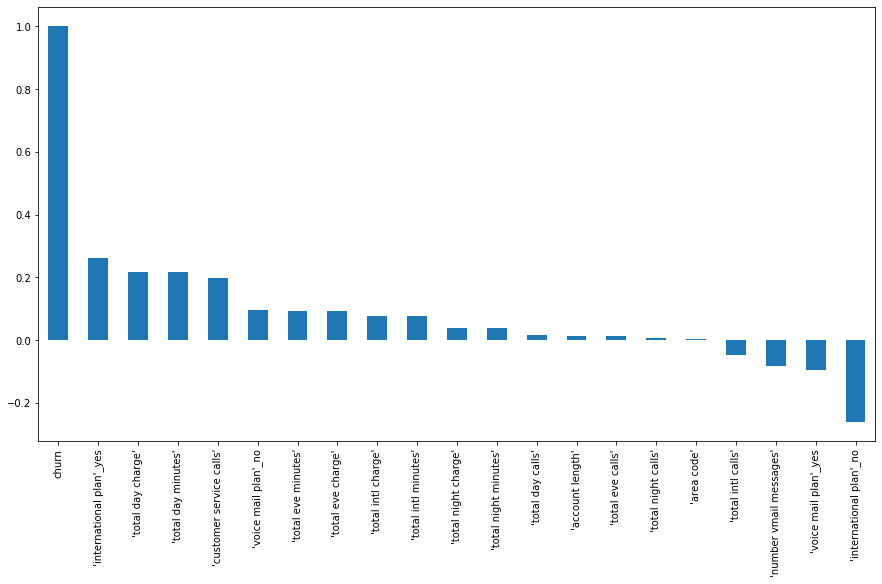

In [77]:
import matplotlib.pyplot as plt 
import seaborn as sns

#Get Correlation of "Churn" with respect to other variables:
plt.figure(figsize=(15,8))
churn_data.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

churn Class:  2
NORMAL data distribution: Counter({False: 85500, True: 14490})


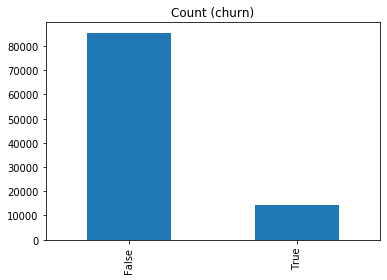

In [78]:
churn_count = churn_data.churn.value_counts()

print("churn Class: ", len(churn_count))

#Normal Distribution
print("NORMAL data distribution: {}".format(Counter(churn_data['churn'])))
churn_count.plot(kind='bar', title='Count (churn)');

In [79]:
churn_data.dtypes

state                        object
'account length'              int64
'area code'                   int64
'phone number'               object
'number vmail messages'       int64
'total day minutes'         float64
'total day calls'             int64
'total day charge'          float64
'total eve minutes'         float64
'total eve calls'             int64
'total eve charge'          float64
'total night minutes'       float64
'total night calls'           int64
'total night charge'        float64
'total intl minutes'        float64
'total intl calls'            int64
'total intl charge'         float64
'customer service calls'      int64
churn                          bool
'international plan'_no       uint8
'international plan'_yes      uint8
'voice mail plan'_no          uint8
'voice mail plan'_yes         uint8
dtype: object

In [80]:
#churn_data['\'international plan\''].replace(to_replace='yes', value=1, inplace=True)
#churn_data['\'international plan\''].replace(to_replace='no',  value=0, inplace=True)

#churn_data['\'voice mail plan\''].replace(to_replace='yes', value=1, inplace=True)
#churn_data['\'voice mail plan\''].replace(to_replace='no',  value=0, inplace=True)
#churn_data.head(30)

In [81]:
#Dropping the 'insignificant columns 
churn_data.drop(['state', '\'phone number\'' ], axis=1, inplace=True)
#churn_data.drop(['state', 'phone number', 'international plan', 'voice mail plan' ], axis=1, inplace=True)
churn_data['churn'] = churn_data['churn'].apply(lambda x: 1 if x == False else -1)

#spilt the target varibale and Predictors
X = churn_data.drop("churn", axis = 1)
y = churn_data.churn

#X = churn_data[:20000].drop("churn", axis = 1)
#y = churn_data[:20000].churn
#print(churn_data['churn'])

churn_count = churn_data.churn.value_counts()
print("churn Class: ", len(churn_count))

#print('Class 0:', churn_count[0])
#print('Class 1:', churn_count[1])
#print('\n')

#print('Proportion:', round(churn_count[0] / churn_count[1], 2), ': 1')
#churn_data
#print(y)

#churn_data['churn'].head(1000)

churn Class:  2


In [82]:
churn_data.head()


,'account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes',...,'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls',churn,'international plan'_no,'international plan'_yes,'voice mail plan'_no,'voice mail plan'_yes
0,106,408,0,158.7,74,26.98,64.3,139,5.47,198.5,...,8.93,10.2,4,2.75,1,1,1,0,1,0
1,174,415,0,124.3,76,21.13,277.1,112,23.55,250.7,...,11.28,15.5,5,4.19,3,1,1,0,1,0
2,106,510,0,159.6,94,27.13,276.8,118,23.53,223.5,...,10.06,8.8,3,2.38,0,1,1,0,1,0
3,106,510,0,194.8,133,33.12,213.4,73,18.14,190.8,...,8.59,11.5,7,3.11,0,1,1,0,1,0
4,176,415,0,223.2,76,37.94,214.4,131,18.22,154.4,...,6.95,10.1,2,2.73,3,1,1,0,1,0


In [83]:
# Percentage of missing values in each column
missingDataCount = round((churn_data.isnull().sum()/len(churn_data.index))*100,2)
print("Percentage of missing data \n", missingDataCount)

Percentage of missing data 
 'account length'            0.0
'area code'                 0.0
'number vmail messages'     0.0
'total day minutes'         0.0
'total day calls'           0.0
'total day charge'          0.0
'total eve minutes'         0.0
'total eve calls'           0.0
'total eve charge'          0.0
'total night minutes'       0.0
'total night calls'         0.0
'total night charge'        0.0
'total intl minutes'        0.0
'total intl calls'          0.0
'total intl charge'         0.0
'customer service calls'    0.0
churn                       0.0
'international plan'_no     0.0
'international plan'_yes    0.0
'voice mail plan'_no        0.0
'voice mail plan'_yes       0.0
dtype: float64


In [84]:
# look at descriptive statistics such as mean, min, max, quantiles
churn_data.describe(include='all')

,'account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes',...,'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls',churn,'international plan'_no,'international plan'_yes,'voice mail plan'_no,'voice mail plan'_yes
count,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.00000,99990.000000,99990.000000,...,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000,99990.000000
mean,100.725513,436.516752,8.104810,179.733624,100.552335,30.555264,200.873125,100.09776,17.074397,200.428324,...,9.019371,10.238914,4.485869,2.765022,1.551855,0.710171,0.902490,0.097510,0.722982,0.277018
std,39.577485,42.000144,13.674455,54.868634,20.014616,9.327658,50.680226,19.77694,4.307809,50.353594,...,2.265943,2.793275,2.473865,0.754167,1.301166,0.704033,0.296652,0.296652,0.447528,0.447528
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,23.200000,...,1.040000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.300000,88.000000,24.360000,167.100000,87.00000,14.200000,166.700000,...,7.500000,8.500000,3.000000,2.300000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,100.000000,415.000000,0.000000,179.300000,101.000000,30.480000,201.000000,100.00000,17.090000,201.000000,...,9.050000,10.300000,4.000000,2.780000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,127.000000,415.000000,19.000000,216.800000,114.000000,36.860000,235.300000,113.00000,20.000000,234.900000,...,10.570000,12.100000,6.000000,3.270000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.00000,30.910000,395.000000,...,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
churn_data.dropna(how='any', inplace = True)
#churn_data

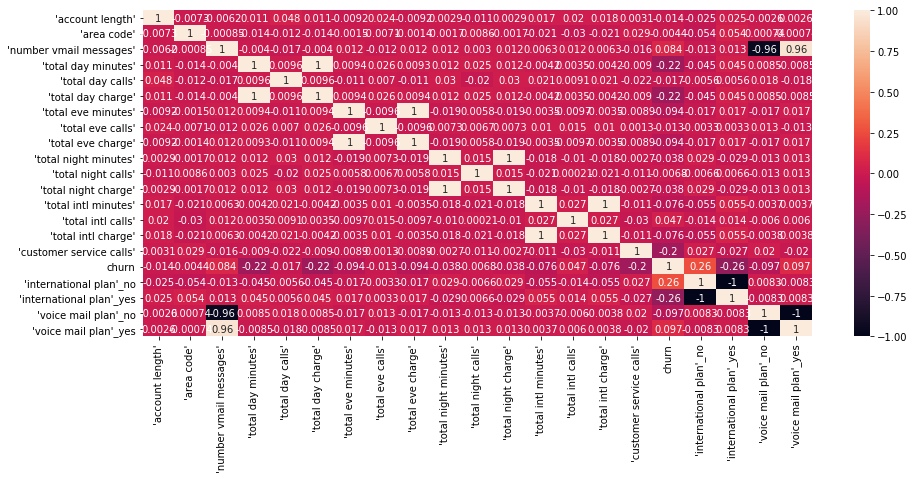

In [86]:
#plotting the correlation matrix, removing the multi colnearity


%matplotlib inline
plt.figure(figsize = (15,6))
sns.heatmap(churn_data.corr(),annot = True)

NORMAL data distribution: Counter({1: 85500, -1: 14490})


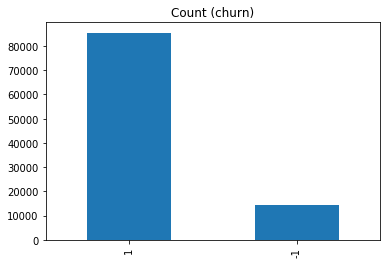

In [87]:
#Normal Distribution
print("NORMAL data distribution: {}".format(Counter(churn_data['churn'])))
churn_count.plot(kind='bar', title='Count (churn)');



In [88]:
#Evaluating with RandomForestClassifier
print("Normal disrtibution: {}" .format("subrata"))
#Normal Distribution
print("NORMAL data distribution: {}".format(Counter(churn_data['churn'])))

#Split the  data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

#using RandomForestClassifier to predict the accuracy BEFORE up-sampling
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#Summary of the accuracy
print_results("\n Data distribution:",y_test, y_pred )



Normal disrtibution: subrata
NORMAL data distribution: Counter({1: 85500, -1: 14490})
Accuracy: 100.00%

 Data distribution:
accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


In [89]:
# adaboost with the tree as base estimator

estimators = list(range(1, 50, 10))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier( base_estimator=shallow_tree,  n_estimators = n_est)
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
   # score = accuracy_score(y_test, y_pred)
   # score = print_results("\nData distribution:",y_test, y_pred )
    #print("\n")
    results = confusion_matrix(y_test, y_pred)
    print('Adaboost - Confusion Matrix :')
    print(results)
    print("*****************")
    abc_scores.append(score)
    

Adaboost - Confusion Matrix :
[[ 1182  3127]
 [  338 25350]]
*****************
Adaboost - Confusion Matrix :
[[ 2762  1547]
 [  497 25191]]
*****************
Adaboost - Confusion Matrix :
[[ 3072  1237]
 [  374 25314]]
*****************
Adaboost - Confusion Matrix :
[[ 3272  1037]
 [  239 25449]]
*****************
Adaboost - Confusion Matrix :
[[ 3440   869]
 [  222 25466]]
*****************


In [90]:
X_test.isnull().any().any()


False

In [91]:
""" HELPER FUNCTION: GET ERROR RATE ========================================="""
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err_train, err_test):
    #print ('Error rate: Training: %.4f - Test: %.4f False Negative: %.4f' % (err_train, err_test, err_miss_fn)) 
    print ('Error rate: Training: %.4f - Test: %.4f' % (err_train, err_test))

def  get_miss_fn(pred, Y) :
    s = 0
    for (x,y) in zip(pred, Y): 
        if (x == -1 and y == 1) :
            s += 1 
    return s

In [92]:
""" PLOT FUNCTION ==========================================================="""
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    #plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

In [93]:
#Split the  data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [94]:
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
           

In [95]:
#the proposed cost-sensitive Adaboost classifier\
import math

def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    miss_fn = []
    #print("w={} ".format(w))
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        #miss_fn = [int(x) for x in (pred_train_i == -1 and Y_train == 1)]
        miss_fn.clear()
        
       # for (x,y) in itertools.izip_longest(pred_train_i, Y_train): 
        for (x,y) in zip(pred_train_i, Y_train): 
            if (x == -1 and y == 1) :
                #print(x,y)
                miss_fn.append(1) 
            else :
                miss_fn.append(0)         
          
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        
        # Error
        err_m = np.dot(w,miss) / sum(w)
        
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))       
        alpha =  [ float(x) * alpha_m for x in miss2]
        beta  =   [ 0.2 * float(x) * alpha_m for x in miss_fn]
        alpha_beta = np.add(alpha,beta)
        exp_alpha_beta = np.exp(alpha_beta)
        w = np.multiply(w, exp_alpha_beta)
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [ x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [ x * alpha_m for x in pred_test_i])]
        
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    
    #print("sum(pred_train != Y)= {}".format(sum(pred_train != Y_train)))
    print("Error: Summery for iteration {} : \n".format(M))
    print("Error: Total Misclassification Error:{}".format(sum(pred_train != Y_train )))
    print("Error: False Negative:{}".format(get_miss_fn(pred_train,Y_train )))
    
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
           

In [97]:
# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
er_tree = generic_clf(y_train, X_train, y_test, X_test, clf_tree)

# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
er_train, er_test = [er_tree[0]], [er_tree[1]]
print("New Cost Sensitive Adaboost : "\n\n)
for i in [10, 20, 40]:    
    er_i = adaboost_clf(y_train, X_train, y_test, X_test, i, clf_tree)
    
    er_train.append(er_i[0])
    er_test.append(er_i[1])
    print_error_rate(er_i[0], er_i[1])
    print(" ***********************************************\n")
    
# Compare error rate vs number of iterations
#plot_error_rate(er_train, er_test)


 New Cost Sensitive Adaboost : 
Error: Summery for iteration 10 : 

Error: Total Misclassification Error:3708
Error: False Negative:521
Error rate: Training: 0.0530 - Test: 0.0522
 ***********************************************

Error: Summery for iteration 20 : 

Error: Total Misclassification Error:3683
Error: False Negative:280
Error rate: Training: 0.0526 - Test: 0.0526
 ***********************************************

Error: Summery for iteration 40 : 

Error: Total Misclassification Error:2724
Error: False Negative:22
Error rate: Training: 0.0389 - Test: 0.0406
 ***********************************************

